In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from lab_utils_common import dlc
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from collections import OrderedDict
from sklearn.datasets import make_blobs
from lab_utils_multiclass_TF import *

In [2]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)
X_tensor = torch.tensor(X_train, dtype = torch.float32)
y_tensor = torch.tensor(y_train, dtype = torch.long)

c:\Users\kissi\My Drive (kissiedukwabena4@gmail.com)\Advanced Learning Algorithms\Week 2\optional-labs\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


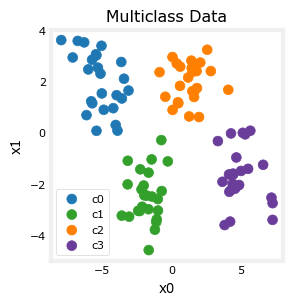

In [5]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [6]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [30]:
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.input_size = input_size

        self.net = nn.Sequential(
            nn.Linear(input_size, 2),
            nn.ReLU(),
            nn.Linear(2, 4)
        )

    def forward(self, x):
        return self.net(x)

In [31]:
MC = NN(input_size = 2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MC.parameters(), lr=0.01)
num_epochs = 200


In [32]:
dataset = TensorDataset(X_tensor, y_tensor)
batch_size = 32
train_loader = DataLoader(dataset = dataset, batch_size = batch_size, shuffle = True)

for epoch in range(num_epochs):
    MC.train()
    epoch_loss = 0.0
    num_batches = 0
    
    for batch_idx, (data_batch, target_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = MC(data_batch)
        loss = criterion(outputs, target_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        num_batches += 1


    avg_epoch_loss = epoch_loss / num_batches

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch +1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

Epoch [1/200], Loss: 2.0183
Epoch [2/200], Loss: 2.1830
Epoch [3/200], Loss: 1.9861
Epoch [4/200], Loss: 1.7805
Epoch [5/200], Loss: 1.7957
Epoch [6/200], Loss: 1.5289
Epoch [7/200], Loss: 1.5342
Epoch [8/200], Loss: 1.4699
Epoch [9/200], Loss: 1.3935
Epoch [10/200], Loss: 1.2933
Epoch [11/200], Loss: 1.3127
Epoch [12/200], Loss: 1.3180
Epoch [13/200], Loss: 1.2735
Epoch [14/200], Loss: 1.2046
Epoch [15/200], Loss: 1.1975
Epoch [16/200], Loss: 1.1705
Epoch [17/200], Loss: 1.1285
Epoch [18/200], Loss: 1.1572
Epoch [19/200], Loss: 1.1364
Epoch [20/200], Loss: 1.0904
Epoch [21/200], Loss: 1.0814
Epoch [22/200], Loss: 1.0967
Epoch [23/200], Loss: 1.0731
Epoch [24/200], Loss: 1.0047
Epoch [25/200], Loss: 0.9992
Epoch [26/200], Loss: 1.0125
Epoch [27/200], Loss: 0.9888
Epoch [28/200], Loss: 0.9739
Epoch [29/200], Loss: 0.9231
Epoch [30/200], Loss: 0.8819
Epoch [31/200], Loss: 0.7975
Epoch [32/200], Loss: 0.8543
Epoch [33/200], Loss: 0.8675
Epoch [34/200], Loss: 0.8417
Epoch [35/200], Loss: 0

In [33]:
MC.eval()

NN(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=4, bias=True)
  )
)

In [17]:
with torch.no_grad():
    outputs = MC(X_tensor) 
    predicted_classes = torch.argmax(outputs, dim = 1)
    predicted_classes = predicted_classes.detach().cpu().numpy()
    probabilities = F.softmax(outputs, dim=1)
    probs_np = probabilities.detach().cpu().numpy()

for i in range(10):
    print(f"Sample {i} \n probabilities: {probs_np[i]} \n predicted class: {predicted_classes[i]} \n true class: {y_train[i]}")

Sample 0 
 probabilities: [0.   0.04 0.01 0.95] 
 predicted class: 3 
 true class: 3
Sample 1 
 probabilities: [0.   0.04 0.01 0.95] 
 predicted class: 3 
 true class: 3
Sample 2 
 probabilities: [0.   0.04 0.01 0.95] 
 predicted class: 3 
 true class: 3
Sample 3 
 probabilities: [1.00e+00 5.50e-10 3.99e-05 5.31e-24] 
 predicted class: 0 
 true class: 0
Sample 4 
 probabilities: [0.   0.04 0.01 0.95] 
 predicted class: 3 
 true class: 3
Sample 5 
 probabilities: [0.   0.04 0.01 0.95] 
 predicted class: 3 
 true class: 3
Sample 6 
 probabilities: [0.   0.04 0.01 0.95] 
 predicted class: 3 
 true class: 3
Sample 7 
 probabilities: [0.   0.04 0.01 0.95] 
 predicted class: 3 
 true class: 3
Sample 8 
 probabilities: [2.23e-03 3.77e-07 9.98e-01 3.00e-06] 
 predicted class: 2 
 true class: 2
Sample 9 
 probabilities: [9.99e-01 6.56e-11 7.88e-04 1.08e-23] 
 predicted class: 0 
 true class: 0


In [35]:
print(f'{MC.net[0].weight.data}')

tensor([[-0.3856,  1.9091],
        [ 1.0241,  0.9564]])
